In [1]:
import pickle
import networkx as nx
import pprint
from new_utils import (Greedy, simple_random_selection, 
                       analyze_network_by_labels, find_best_set_of_leaders, 
                       get_connected_subgraph, select_nodes_by_label, comm_eff, 
                       randomAlgo, create_unique_label_combinations)
import preprocessing as pp
import numpy as np
import random
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
network = pickle.load(open('./final_networks/network_size_20.pkl', 'rb'))
G = network.copy()

print("Network Attributes")
print("------------------")
print(f"Num of Nodes: {G.number_of_nodes()}")
print(f"Num of Edges: {G.number_of_edges()}")

label_counts = nx.get_node_attributes(G, 'label')
label_counts = dict(Counter(label_counts.values()))
print(label_counts)

Network Attributes
------------------
Num of Nodes: 20
Num of Edges: 52
{'DB': 5, 'AI': 5, 'DM': 5, 'T': 5}


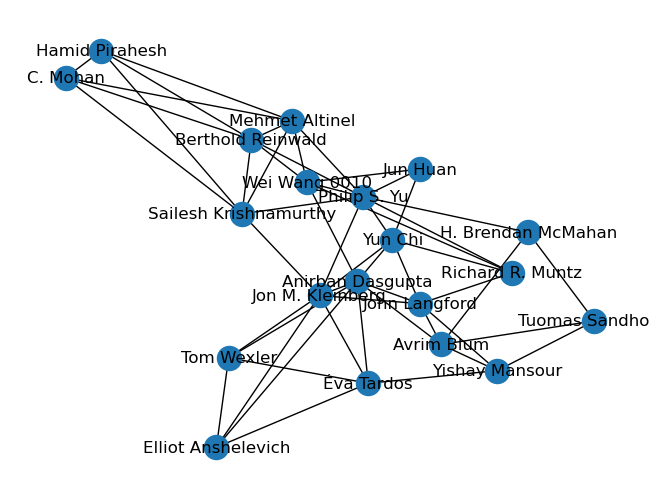

In [46]:
nx.draw(G, with_labels=True)
plt.show()

In [22]:
# create the project networks
list_1 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T')]
list_2 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T'), ('DM', 'DB'), ('DM', 'AI'), ('DB', 'AI')]
# list_3 = [('DM', 'AI'), ('DB', 'T'), ('AI', 'DB')]
list_3 = [('DM', 'AI'), ('DB', 'T'), ('AI', 'T')]

star_proj = pp.createProjectNetwork(list_1)
full_proj = pp.createProjectNetwork(list_2)
chain_proj = pp.createProjectNetwork(list_3)

project_net = chain_proj

# G = pp.remove_edges_based_on_project_network(network.copy(), project_net)

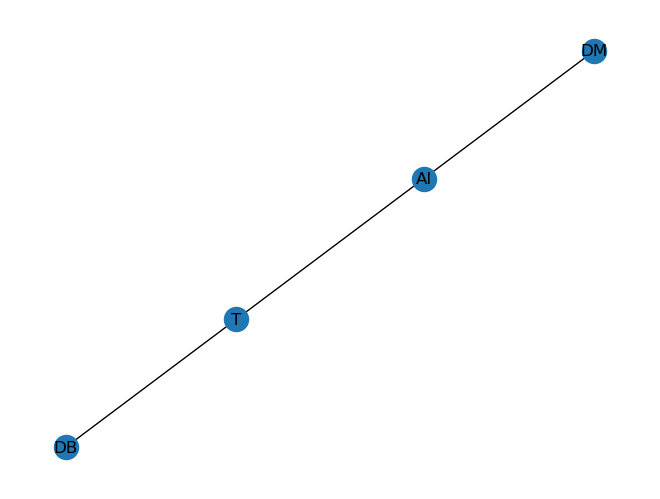

In [24]:
nx.draw(chain_proj, with_labels=True)
plt.show()

#### 20-NODE NETWORK


Total number of top nodes across all labels: 4
---Influence Greedy---
Current best set {'Elliot Anshelevich', 'Avrim Blum', 'Wei Wang 0010', 'Mehmet Altinel'}: eff score: 0.87
Current best set {'Elliot Anshelevich', 'Avrim Blum', 'Wei Wang 0010', 'Sailesh Krishnamurthy'}: eff score: 0.8734
Best Set of Leaders: {'Elliot Anshelevich', 'Avrim Blum', 'Wei Wang 0010', 'Sailesh Krishnamurthy'}, Efficiency: 87.33999999999999
Nodes not in top nodes: set()


---Greedy---
Current best set {'Hamid Pirahesh', 'Avrim Blum', 'Wei Wang 0010', 'Elliot Anshelevich'}: eff score: 0.8693
Current best set {'Elliot Anshelevich', 'Avrim Blum', 'Wei Wang 0010', 'Mehmet Altinel'}: eff score: 0.87
Current best set {'Elliot Anshelevich', 'Avrim Blum', 'Wei Wang 0010', 'Sailesh Krishnamurthy'}: eff score: 0.8734
Best Set of Leaders: {'Elliot Anshelevich', 'Avrim Blum', 'Wei Wang 0010', 'Sailesh Krishnamurthy'}, Efficiency: 87.33999999999999
Nodes not in top nodes: set()


---Influence only---
Top Nodes in the Ne

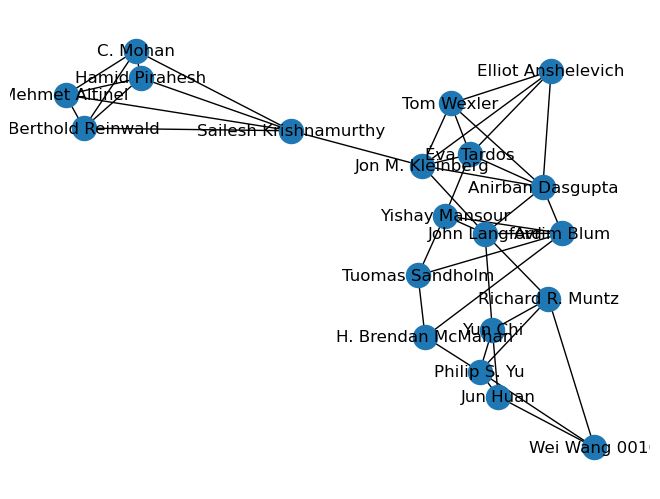

In [49]:
# loading the network
network = pickle.load(open('./final_networks/network_size_20.pkl', 'rb'))
# net = network.copy()
net = pp.remove_edges_based_on_project_network(network.copy(), project_net)

# print("Network Attributes Before Augmentation")
# print("------------------")
# print(f"Num of Nodes: {network.number_of_nodes()}")
# print(f"Num of Edges: {network.number_of_edges()}")

# print("Network Attributes After Augmentation")
# print("------------------")
# print(f"Num of Nodes: {net.number_of_nodes()}")
# print(f"Num of Edges: {net.number_of_edges()}")

results, top_nodes = analyze_network_by_labels(net)

print("---Influence Greedy---")
best_set, max_eff = find_best_set_of_leaders(net, top_nodes)
print(f"Best Set of Leaders: {best_set}, Efficiency: {100 * max_eff}")
print(f"Nodes not in top nodes: {best_set - set(top_nodes)}")
print("\n")

print("---Greedy---")
best_set, max_eff = find_best_set_of_leaders(net, list(net.nodes()))
print(f"Best Set of Leaders: {best_set}, Efficiency: {100 * max_eff}")
print(f"Nodes not in top nodes: {best_set - set(top_nodes)}")
print("\n")

print("---Influence only---")
combinations = create_unique_label_combinations(net, top_nodes)
total = 0.0
iters = 0
print(f"Top Nodes in the Network: {set(top_nodes)}")
print(f"Total combinations: {len(combinations)}")
for i, combo in enumerate(combinations[:100], 1):  # Print first 5 combinations
    nodes = [node['id'] for node in combo]
    # print(f"{nodes}: --> Efficiency : {comm_eff(net, nodes)}")
    total += comm_eff(net, nodes)
    iters += 1
print(f"Average for combination {iters} combinations of leaders is: {round(100 * (total/iters), 4)}")
print("\n")

print("---Random Monte Carlo---")
print(f"Communication efficiency of Random Algorithm: {100 * (randomAlgo(net))}")

nx.draw(net, with_labels=True)
plt.show()

In [47]:
net.nodes['Jon M. Kleinberg']

{'label': 'T', 'closeness_centrality': 0.2853428065087498}

In [48]:
net.nodes['Wei Wang 0010']

{'label': 'DM', 'closeness_centrality': 0.24305811847762948}

In [50]:
net.nodes['Tuomas Sandholm']

{'label': 'AI', 'closeness_centrality': 0.3714849867229522}

In [51]:
net.nodes['C. Mohan']

{'label': 'DB', 'closeness_centrality': 0.5425780760200795}

#### 40-NODE NETWORK


Total number of top nodes across all labels: 4
---Influence Greedy---
Current best set {'Éva Tardos', 'Sham Kakade', 'Sailesh Krishnamurthy', 'Philip S. Yu'}: eff score: 0.7365
Best Set of Leaders: {'Éva Tardos', 'Sham Kakade', 'Sailesh Krishnamurthy', 'Philip S. Yu'}, Efficiency: 73.65
Nodes not in top nodes: {'Sham Kakade'}


---Greedy---
Current best set {'Hamid Pirahesh', 'Éva Tardos', 'Sham Kakade', 'Philip S. Yu'}: eff score: 0.7223
Current best set {'Éva Tardos', 'Sham Kakade', 'Philip S. Yu', 'Sailesh Krishnamurthy'}: eff score: 0.7365
Best Set of Leaders: {'Éva Tardos', 'Sham Kakade', 'Philip S. Yu', 'Sailesh Krishnamurthy'}, Efficiency: 73.65
Nodes not in top nodes: {'Sham Kakade'}


---Influence only---
Top Nodes in the Network: {'Avrim Blum', 'Éva Tardos', 'Sailesh Krishnamurthy', 'Philip S. Yu'}
Total combinations: 1
Average for combination 1 combinations of leaders is: 73.36


---Random Monte Carlo---
Communication efficiency of Random Algorithm: 59.9


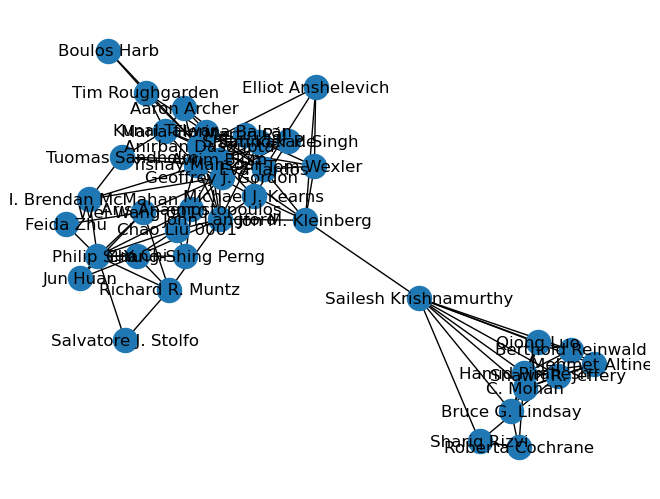

In [26]:
# loading the network
network = pickle.load(open('./final_networks/network_size_40.pkl', 'rb'))
# net = network.copy()
net = pp.remove_edges_based_on_project_network(network.copy(), project_net)

# print("Network Attributes Before Augmentation")
# print("------------------")
# print(f"Num of Nodes: {network.number_of_nodes()}")
# print(f"Num of Edges: {network.number_of_edges()}")
# print('\n')

# print("Network Attributes After Augmentation")
# print("------------------")
# print(f"Num of Nodes: {net.number_of_nodes()}")
# print(f"Num of Edges: {net.number_of_edges()}")
# print('\n')

results, top_nodes = analyze_network_by_labels(net)

print("---Influence Greedy---")
best_set, max_eff = find_best_set_of_leaders(net, top_nodes)
print(f"Best Set of Leaders: {best_set}, Efficiency: {100 * max_eff}")
print(f"Nodes not in top nodes: {best_set - set(top_nodes)}")
print("\n")

print("---Greedy---")
best_set, max_eff = find_best_set_of_leaders(net, list(net.nodes()))
print(f"Best Set of Leaders: {best_set}, Efficiency: {100 * max_eff}")
print(f"Nodes not in top nodes: {best_set - set(top_nodes)}")
print("\n")

print("---Influence only---")
combinations = create_unique_label_combinations(net, top_nodes)
total = 0.0
iters = 0
print(f"Top Nodes in the Network: {set(top_nodes)}")
print(f"Total combinations: {len(combinations)}")
for i, combo in enumerate(combinations[:100], 1):  # Print first 5 combinations
    nodes = [node['id'] for node in combo]
    # print(f"{nodes}: --> Efficiency : {comm_eff(net, nodes)}")
    total += comm_eff(net, nodes)
    iters += 1
print(f"Average for combination {iters} combinations of leaders is: {100 * (total/iters)}")
print("\n")

print("---Random Monte Carlo---")
print(f"Communication efficiency of Random Algorithm: {100 * (randomAlgo(net))}")

nx.draw(net, with_labels=True)
plt.show()

##### 60-NODE NETWORK


Total number of top nodes across all labels: 4
---Influence Greedy---
Current best set {'Hamid Pirahesh', 'Éva Tardos', 'Sham Kakade', 'Philip S. Yu'}: eff score: 0.6742
Current best set {'Hamid Pirahesh', 'Tim Roughgarden', 'Philip S. Yu', 'Satinder P. Singh'}: eff score: 0.6926
Current best set {'Elliot Anshelevich', 'Philip S. Yu', 'Hamid Pirahesh', 'Satinder P. Singh'}: eff score: 0.6973
Best Set of Leaders: {'Elliot Anshelevich', 'Philip S. Yu', 'Hamid Pirahesh', 'Satinder P. Singh'}, Efficiency: 69.73
Nodes not in top nodes: {'Elliot Anshelevich', 'Satinder P. Singh'}


---Greedy---
Current best set {'Hamid Pirahesh', 'Tim Roughgarden', 'Philip S. Yu', 'Satinder P. Singh'}: eff score: 0.6926
Current best set {'Elliot Anshelevich', 'Philip S. Yu', 'Hamid Pirahesh', 'Satinder P. Singh'}: eff score: 0.6973
Best Set of Leaders: {'Elliot Anshelevich', 'Philip S. Yu', 'Hamid Pirahesh', 'Satinder P. Singh'}, Efficiency: 69.73
Nodes not in top nodes: {'Elliot Anshelevich', 'Satinder P. 

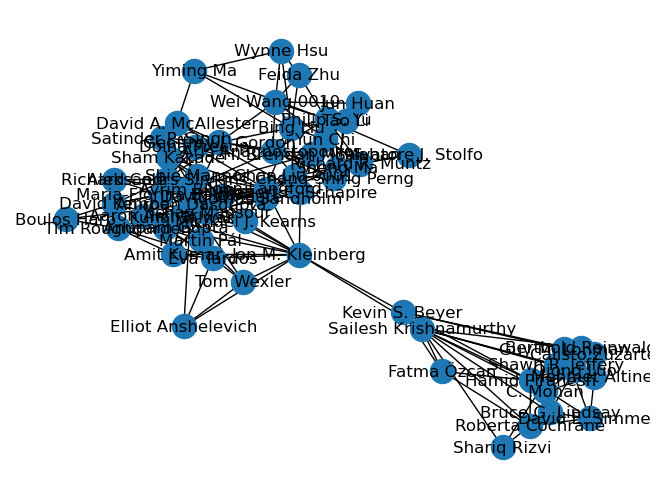

In [27]:
# loading the network
network = pickle.load(open('./final_networks/network_size_60.pkl', 'rb'))
# net = network.copy()
net = pp.remove_edges_based_on_project_network(network.copy(), project_net)

# print("Network Attributes Before Augmentation")
# print("------------------")
# print(f"Num of Nodes: {network.number_of_nodes()}")
# print(f"Num of Edges: {network.number_of_edges()}")
# print('\n')

# print("Network Attributes After Augmentation")
# print("------------------")
# print(f"Num of Nodes: {net.number_of_nodes()}")
# print(f"Num of Edges: {net.number_of_edges()}")
# print('\n')

results, top_nodes = analyze_network_by_labels(net)

print("---Influence Greedy---")
best_set, max_eff = find_best_set_of_leaders(net, top_nodes)
print(f"Best Set of Leaders: {best_set}, Efficiency: {100 * max_eff}")
print(f"Nodes not in top nodes: {best_set - set(top_nodes)}")
print("\n")

print("---Greedy---")
best_set, max_eff = find_best_set_of_leaders(net, list(net.nodes()))
print(f"Best Set of Leaders: {best_set}, Efficiency: {100 * max_eff}")
print(f"Nodes not in top nodes: {best_set - set(top_nodes)}")
print("\n")

print("---Influence only---")
combinations = create_unique_label_combinations(net, top_nodes)
total = 0.0
iters = 0
print(f"Top Nodes in the Network: {set(top_nodes)}")
print(f"Total combinations: {len(combinations)}")
for i, combo in enumerate(combinations[:100], 1):  # Print first 5 combinations
    nodes = [node['id'] for node in combo]
    # print(f"{nodes}: --> Efficiency : {comm_eff(net, nodes)}")
    total += comm_eff(net, nodes)
    iters += 1
print(f"Average for combination {iters} combinations of leaders is: {100 * (total/iters)}")
print("\n")

print("---Random Monte Carlo---")
print(f"Communication efficiency of Random Algorithm: {100 * randomAlgo(net)}")

nx.draw(net, with_labels=True)
plt.show()

##### 80-NODE NETWORK


Total number of top nodes across all labels: 4
---Influence Greedy---
Current best set {'Hamid Pirahesh', 'Éva Tardos', 'Alina Beygelzimer', 'Philip S. Yu'}: eff score: 0.7796
Current best set {'Elliot Anshelevich', 'Alina Beygelzimer', 'Philip S. Yu', 'Hamid Pirahesh'}: eff score: 0.7876
Best Set of Leaders: {'Elliot Anshelevich', 'Alina Beygelzimer', 'Philip S. Yu', 'Hamid Pirahesh'}, Efficiency: 78.75999999999999
Nodes not in top nodes: {'Elliot Anshelevich', 'Alina Beygelzimer'}


---Greedy---
Current best set {'Calisto Zuzarte', 'Alina Beygelzimer', 'Philip S. Yu', 'Boulos Harb'}: eff score: 0.7391
Current best set {'Elliot Anshelevich', 'Alina Beygelzimer', 'Philip S. Yu', 'Hamid Pirahesh'}: eff score: 0.7876
Best Set of Leaders: {'Elliot Anshelevich', 'Alina Beygelzimer', 'Philip S. Yu', 'Hamid Pirahesh'}, Efficiency: 78.75999999999999
Nodes not in top nodes: {'Elliot Anshelevich', 'Alina Beygelzimer'}


---Influence only---
Top Nodes in the Network: {'Hamid Pirahesh', 'Avrim B

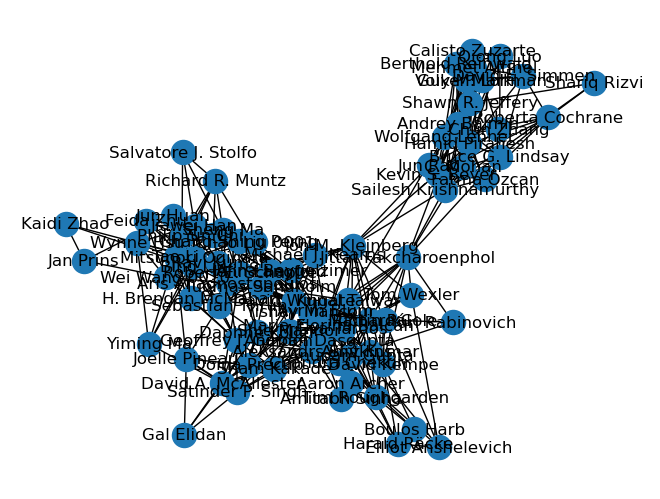

In [28]:
# loading the network
network = pickle.load(open('./final_networks/network_size_80.pkl', 'rb'))
# net = network.copy()
net = pp.remove_edges_based_on_project_network(network.copy(), project_net)

# print("Network Attributes Before Augmentation")
# print("------------------")
# print(f"Num of Nodes: {network.number_of_nodes()}")
# print(f"Num of Edges: {network.number_of_edges()}")
# print('\n')

# print("Network Attributes After Augmentation")
# print("------------------")
# print(f"Num of Nodes: {net.number_of_nodes()}")
# print(f"Num of Edges: {net.number_of_edges()}")
# print('\n')

results, top_nodes = analyze_network_by_labels(net)

print("---Influence Greedy---")
best_set, max_eff = find_best_set_of_leaders(net, top_nodes)
print(f"Best Set of Leaders: {best_set}, Efficiency: {100 * max_eff}")
print(f"Nodes not in top nodes: {best_set - set(top_nodes)}")
print("\n")

print("---Greedy---")
best_set, max_eff = find_best_set_of_leaders(net, list(net.nodes()))
print(f"Best Set of Leaders: {best_set}, Efficiency: {100 * max_eff}")
print(f"Nodes not in top nodes: {best_set - set(top_nodes)}")
print("\n")

print("---Influence only---")
combinations = create_unique_label_combinations(net, top_nodes)
total = 0.0
iters = 0
print(f"Top Nodes in the Network: {set(top_nodes)}")
print(f"Total combinations: {len(combinations)}")
for i, combo in enumerate(combinations[:100], 1):  # Print first 5 combinations
    nodes = [node['id'] for node in combo]
    # print(f"{nodes}: --> Efficiency : {comm_eff(net, nodes)}")
    total += comm_eff(net, nodes)
    iters += 1
print(f"Average for combination {iters} combinations of leaders is: {100 * (total/iters)}")
print("\n")

print("---Random Monte Carlo---")
print(f"Communication efficiency of Random Algorithm: {100 * randomAlgo(net)}")

nx.draw(net, with_labels=True)
plt.show()

In [29]:
net.nodes['Avrim Blum']

{'label': 'AI', 'closeness_centrality': 0.2646213532839215}

In [30]:
net.nodes['Alina Beygelzimer']

{'label': 'AI', 'closeness_centrality': 0.13677655807097297}

In [31]:
comm_eff(net, ['Alina Beygelzimer', 'Éva Tardos', 'Hamid Pirahesh', 'Philip S. Yu']) - comm_eff(net, ['Éva Tardos', 'Hamid Pirahesh', 'Philip S. Yu'])

0.07329999999999992

In [32]:
comm_eff(net, ['Avrim Blum', 'Éva Tardos', 'Hamid Pirahesh', 'Philip S. Yu']) - comm_eff(net, ['Éva Tardos', 'Hamid Pirahesh', 'Philip S. Yu'])

-0.03500000000000003

In [33]:
comm_eff(net, ['Avrim Blum', 'Éva Tardos', 'Hamid Pirahesh', 'Philip S. Yu'])

0.6713

In [34]:
comm_eff(net, ['Éva Tardos', 'Hamid Pirahesh', 'Philip S. Yu'])

0.7063

In [35]:
0.1427 + 0.008099999999999996

0.1508

In [36]:
(0.466 - 0.2258)/0.466

0.515450643776824

##### 100-NODE NETWORK


Total number of top nodes across all labels: 4
---Influence Greedy---
Current best set {'Calisto Zuzarte', 'Éva Tardos', 'Alina Beygelzimer', 'Feida Zhu'}: eff score: 0.8058
Current best set {'Hamid Pirahesh', 'Alina Beygelzimer', 'Boulos Harb', 'Feida Zhu'}: eff score: 0.8529
Current best set {'Hamid Pirahesh', 'Alina Beygelzimer', 'Philip S. Yu', 'Boulos Harb'}: eff score: 0.8583
Best Set of Leaders: {'Hamid Pirahesh', 'Alina Beygelzimer', 'Philip S. Yu', 'Boulos Harb'}, Efficiency: 85.83
Nodes not in top nodes: {'Alina Beygelzimer', 'Boulos Harb'}


---Greedy---
Current best set {'Calisto Zuzarte', 'Alina Beygelzimer', 'Boulos Harb', 'Sheng Ma'}: eff score: 0.8749
Best Set of Leaders: {'Calisto Zuzarte', 'Alina Beygelzimer', 'Boulos Harb', 'Sheng Ma'}, Efficiency: 87.49
Nodes not in top nodes: {'Calisto Zuzarte', 'Alina Beygelzimer', 'Boulos Harb', 'Sheng Ma'}


---Influence only---
Top Nodes in the Network: {'Hamid Pirahesh', 'Avrim Blum', 'Éva Tardos', 'Philip S. Yu'}
Total combi

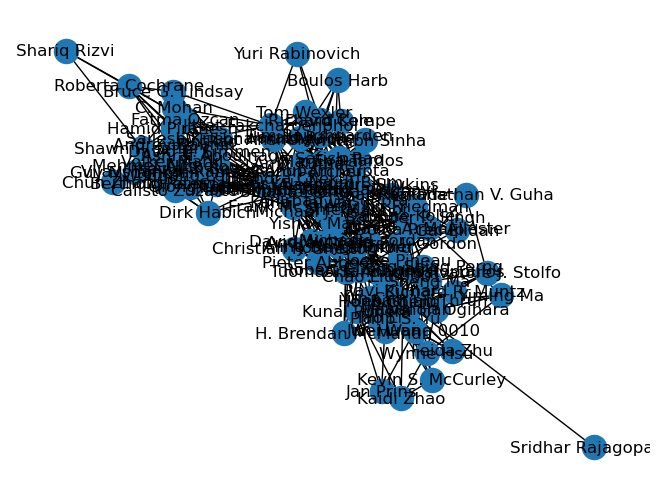

In [37]:
# loading the network
network = pickle.load(open('./final_networks/network_size_100.pkl', 'rb'))
# net = network.copy()
net = pp.remove_edges_based_on_project_network(network.copy(), project_net)

# print("Network Attributes Before Augmentation")
# print("------------------")
# print(f"Num of Nodes: {network.number_of_nodes()}")
# print(f"Num of Edges: {network.number_of_edges()}")
# print('\n')

# print("Network Attributes After Augmentation")
# print("------------------")
# print(f"Num of Nodes: {net.number_of_nodes()}")
# print(f"Num of Edges: {net.number_of_edges()}")
# print('\n')

results, top_nodes = analyze_network_by_labels(net)

print("---Influence Greedy---")
best_set, max_eff = find_best_set_of_leaders(net, top_nodes)
print(f"Best Set of Leaders: {best_set}, Efficiency: {100 * max_eff}")
print(f"Nodes not in top nodes: {best_set - set(top_nodes)}")
print("\n")

print("---Greedy---")
best_set, max_eff = find_best_set_of_leaders(net, list(net.nodes()))
print(f"Best Set of Leaders: {best_set}, Efficiency: {100 * max_eff}")
print(f"Nodes not in top nodes: {best_set - set(top_nodes)}")
print("\n")

print("---Influence only---")
combinations = create_unique_label_combinations(net, top_nodes)
total = 0.0
iters = 0
print(f"Top Nodes in the Network: {set(top_nodes)}")
print(f"Total combinations: {len(combinations)}")
for i, combo in enumerate(combinations[:100], 1):  # Print first 5 combinations
    nodes = [node['id'] for node in combo]
    # print(f"{nodes}: --> Efficiency : {comm_eff(net, nodes)}")
    total += comm_eff(net, nodes)
    iters += 1
print(f"Average for combination {iters} combinations of leaders is: {100 * (total/iters)}")
print("\n")

print("---Random Monte Carlo---")
print(f"Communication efficiency of Random Algorithm: {100 * randomAlgo(net)}")

nx.draw(net, with_labels=True)
plt.show()